![LogoTec](img/logoTec.png)

## TC 5033
### Word Embeddings
## Team Members:
- A01200230 - Armando Bringas Corpus

<br>

#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy
<br>

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project: 
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



#### Import libraries

In [19]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle

from typing import Dict, List, Tuple
plt.style.use('ggplot')

#### Load file

In [2]:
# PATH = '/media/pepe/DataUbuntu/Databases/glove_embeddings/glove.6B.200d.txt'
PATH = 'data/glove_embeddings/glove.6B.50d.txt'
emb_dim = 50

In [3]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    embeddings_dict = {}
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_dict[word] = vector
    return embeddings_dict

In [4]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

In [5]:
# Serialize
with open('data/glove_embeddings/embeddings_dict_50D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
with open('data/glove_embeddings/embeddings_dict_50D.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)

#### See some embeddings

In [6]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [7]:
show_n_first_words(PATH, 5)

['the', '0.418', '0.24968', '-0.41242', '0.1217', '0.34527', '-0.044457', '-0.49688', '-0.17862', '-0.00066023', '-0.6566', '0.27843', '-0.14767', '-0.55677', '0.14658', '-0.0095095', '0.011658', '0.10204', '-0.12792', '-0.8443', '-0.12181', '-0.016801', '-0.33279', '-0.1552', '-0.23131', '-0.19181', '-1.8823', '-0.76746', '0.099051', '-0.42125', '-0.19526', '4.0071', '-0.18594', '-0.52287', '-0.31681', '0.00059213', '0.0074449', '0.17778', '-0.15897', '0.012041', '-0.054223', '-0.29871', '-0.15749', '-0.34758', '-0.045637', '-0.44251', '0.18785', '0.0027849', '-0.18411', '-0.11514', '-0.78581'] 50
[',', '0.013441', '0.23682', '-0.16899', '0.40951', '0.63812', '0.47709', '-0.42852', '-0.55641', '-0.364', '-0.23938', '0.13001', '-0.063734', '-0.39575', '-0.48162', '0.23291', '0.090201', '-0.13324', '0.078639', '-0.41634', '-0.15428', '0.10068', '0.48891', '0.31226', '-0.1252', '-0.037512', '-1.5179', '0.12612', '-0.02442', '-0.042961', '-0.28351', '3.5416', '-0.11956', '-0.014533', '-0.

### Plot some embeddings

In [8]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    # Extract the embeddings for the specified words
    selected_embeddings = np.array([embeddings_dict[word] for word in words2show if word in embeddings_dict])
    
    # Check if selected_embeddings is not empty
    if selected_embeddings.shape[0] == 0:
        raise ValueError("None of the specified words were found in the embeddings dictionary.")

    # Fit the dimensionality reduction model
    model = func(n_components=2)
    reduced_embeddings = model.fit_transform(selected_embeddings)

    if func == PCA:
        model = PCA(n_components=2)
        reduced_embeddings = model.fit_transform(selected_embeddings)
    elif func == TSNE:
        model = TSNE(n_components=2)
        reduced_embeddings = model.fit_transform(selected_embeddings)

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
    for i, word in enumerate(words2show):
        plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))
    
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'{func.__name__} visualization of word embeddings')
    plt.grid(True)
    plt.show()

In [9]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips', 
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']


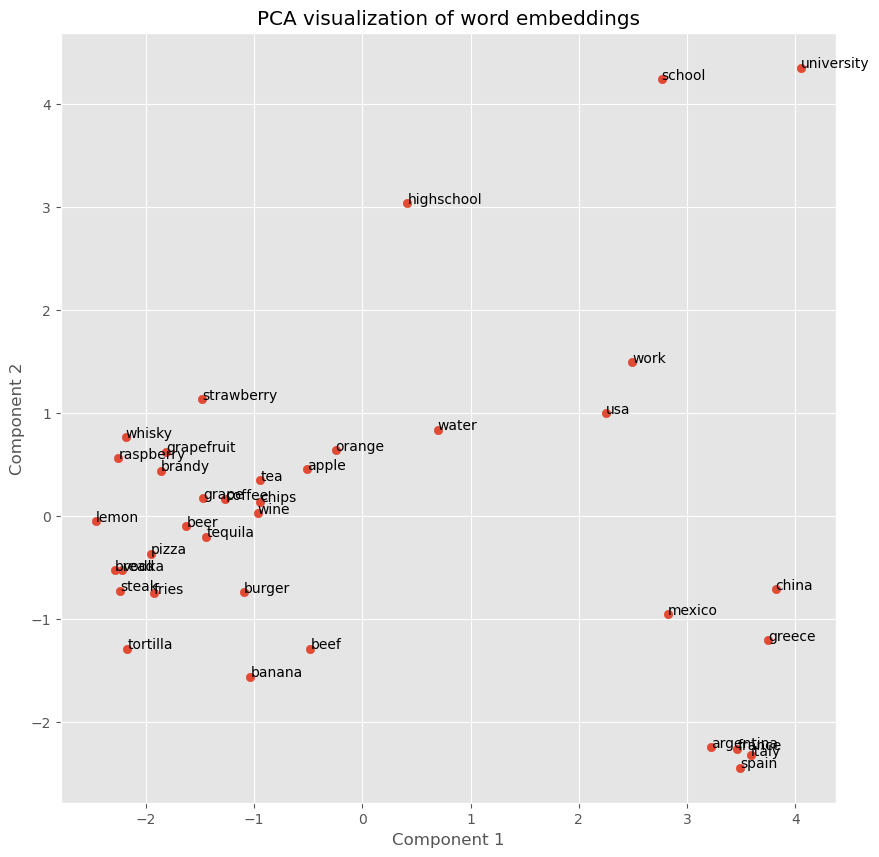

In [10]:
# 
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

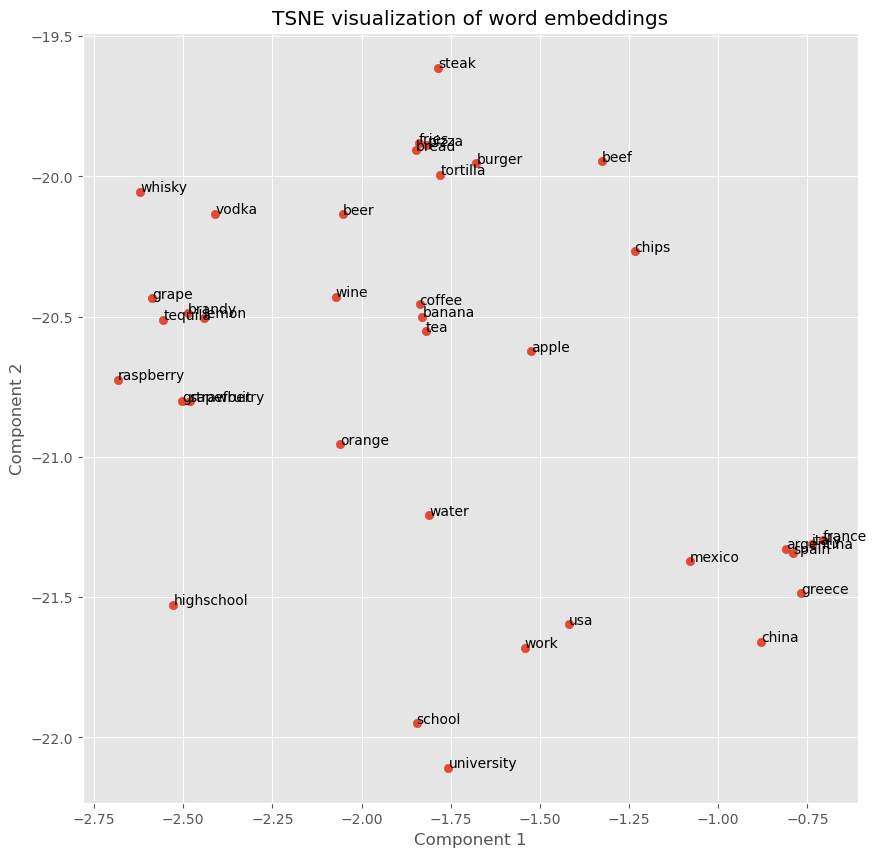

In [11]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

In [12]:
def cosine_similarity(vec_a, vec_b):
    # Compute the cosine similarity between two vectors
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return dot_product / (norm_a * norm_b)

In [50]:
# analogy
def analogy(word1: str, word2: str, word3: str, embeddings_dict: Dict[str, np.ndarray], n: int = 1) -> str:
    # Check if words exist in the embeddings dictionary
    if word1 not in embeddings_dict or word2 not in embeddings_dict or word3 not in embeddings_dict:
        raise ValueError("One or more words are not in the embeddings dictionary.")
    
    # Calculate the target vector for the analogy
    target_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # Initialize variables to keep track of the closest word and highest similarity
    closest_word = None
    highest_similarity = -1  # Start with -1 as cosine similarity ranges from -1 to 1

    # Define exclusion set for input words
    exclusion_words = {word1, word2, word3}

    # Iterate through the embeddings to find the closest word
    for word, vector in embeddings_dict.items():
        if word not in exclusion_words:
            similarity = cosine_similarity(target_vector, vector)
            if similarity > highest_similarity:
                highest_similarity = similarity
                closest_word = word

    # Check if a closest word was found
    if closest_word is None:
        raise ValueError("No valid words found to complete the analogy.")

    return closest_word

In [51]:
word1 = 'man'
word2 = 'king'
word3 = 'woman'
analogy = analogy('man', 'king', 'woman', embeddings_dict)
print(f"{word1} is to {word2} as {word3} is to {analogy}")

man is to king as woman is to queen


In [52]:
def find_most_similar(word: str, embeddings_dict: Dict[str, np.ndarray], top_n: int = 10) -> List[str]:
    if word not in embeddings_dict:
        return [f"The word '{word}' is not in the embeddings dictionary."]

    target_vector = embeddings_dict[word]
    similarities = []

    for other_word, other_vector in embeddings_dict.items():
        if other_word != word:
            similarity = cosine_similarity(target_vector, other_vector)
            similarities.append((similarity, other_word))
    
    # Sort based on similarity scores in descending order and take the top n words
    most_similar_words = [word for _, word in sorted(similarities, reverse=True)[:top_n]]

    return most_similar_words

In [53]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [54]:
print(most_similar)
print("------------------------------------------------------------------------------------------------------")
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w}')

['mexican', 'venezuela', 'colombia', 'peru', 'chile', 'puerto', 'rico', 'cuba', 'guatemala', 'panama']
------------------------------------------------------------------------------------------------------
1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> chile
6 ---> puerto
7 ---> rico
8 ---> cuba
9 ---> guatemala
10 ---> panama
